# using inbuilt function


=== Smooth Image ===
Original Image Size: 225 x 225 = 50625 values
k=1: Compressed Size=451, Ratio=0.0089
k=5: Compressed Size=2255, Ratio=0.0445
k=10: Compressed Size=4510, Ratio=0.0891
k=20: Compressed Size=9020, Ratio=0.1782
k=40: Compressed Size=18040, Ratio=0.3563
k=50: Compressed Size=22550, Ratio=0.4454


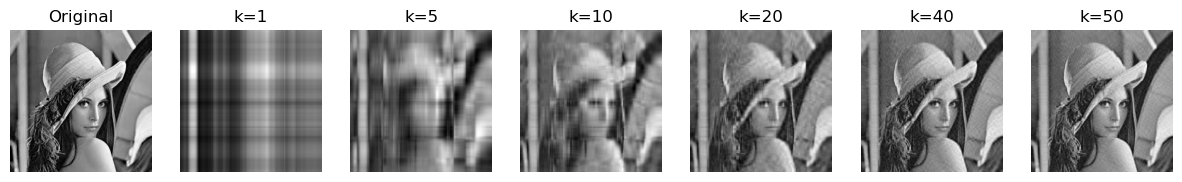


=== Edge-dominant Image ===
Original Image Size: 348 x 330 = 114840 values
k=1: Compressed Size=679, Ratio=0.0059
k=5: Compressed Size=3395, Ratio=0.0296
k=10: Compressed Size=6790, Ratio=0.0591
k=20: Compressed Size=13580, Ratio=0.1183
k=40: Compressed Size=27160, Ratio=0.2365
k=50: Compressed Size=33950, Ratio=0.2956


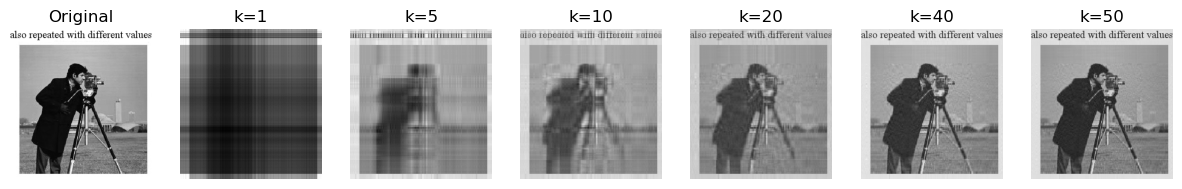


=== Textured Image ===
Original Image Size: 512 x 512 = 262144 values
k=1: Compressed Size=1025, Ratio=0.0039
k=5: Compressed Size=5125, Ratio=0.0196
k=10: Compressed Size=10250, Ratio=0.0391
k=20: Compressed Size=20500, Ratio=0.0782
k=40: Compressed Size=41000, Ratio=0.1564
k=50: Compressed Size=51250, Ratio=0.1955


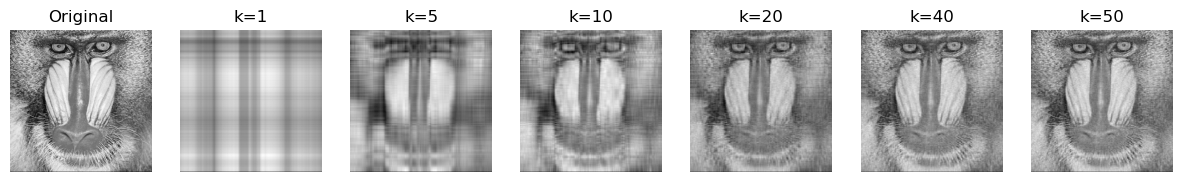

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def load_and_gray(path):
    img = io.imread(path)
    # Handle images with 4 channels (RGBA)
    if img.ndim == 3:
        if img.shape[2] == 4:  # RGBA
            img = color.rgba2rgb(img)  # convert to RGB
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img / 255.0  # normalize if already grayscale
    return img_gray

def svd_reconstruct(img, k):
    U, S, VT = np.linalg.svd(img, full_matrices=False)
    return (U[:, :k] @ np.diag(S[:k]) @ VT[:k, :])

def compression_details(img, k):
    m, n = img.shape
    original_size = m * n
    compressed_size = k * (m + n + 1)
    ratio = compressed_size / original_size
    return original_size, compressed_size, ratio

def show_results(img, ks, title="Image"):
    m, n = img.shape
    print(f"\n=== {title} ===")
    print(f"Original Image Size: {m} x {n} = {m*n} values")
    
    fig, axes = plt.subplots(1, len(ks)+1, figsize=(15, 5))
    axes[0].imshow(img, cmap="gray")
    axes[0].set_title("Original")
    axes[0].axis("off")

    for i, k in enumerate(ks):
        recon = svd_reconstruct(img, k)
        orig, comp, ratio = compression_details(img, k)
        axes[i+1].imshow(recon, cmap="gray")
        axes[i+1].set_title(f"k={k}")
        axes[i+1].axis("off")
        print(f"k={k}: Compressed Size={comp}, Ratio={ratio:.4f}")

    plt.show()

paths = [
    "smooth_image.jpg",
    "Edge-dominant_image.png",
    "Textured_image.ppm"
]

names = ["Smooth Image", "Edge-dominant Image", "Textured Image"]

ks = [1, 5, 10, 20, 40, 50]

for path, name in zip(paths, names):
    img = load_and_gray(path)
    show_results(img, ks, title=name)


# from scratch


=== Smooth Image ===
Original Image Size: 225 x 225 = 50625 values
k=1: Compressed Size=451, Ratio=0.0089
k=5: Compressed Size=2255, Ratio=0.0445
k=10: Compressed Size=4510, Ratio=0.0891
k=20: Compressed Size=9020, Ratio=0.1782
k=40: Compressed Size=18040, Ratio=0.3563
k=50: Compressed Size=22550, Ratio=0.4454


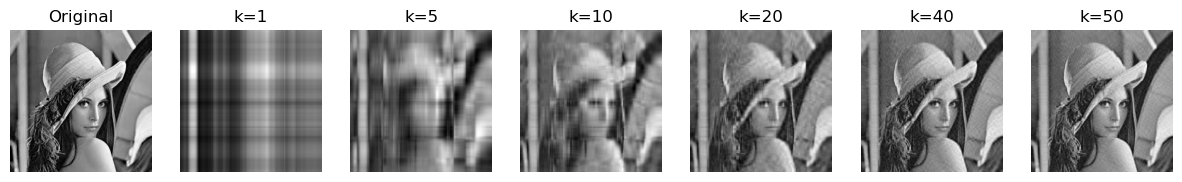


=== Edge-dominant Image ===
Original Image Size: 348 x 330 = 114840 values
k=1: Compressed Size=679, Ratio=0.0059
k=5: Compressed Size=3395, Ratio=0.0296
k=10: Compressed Size=6790, Ratio=0.0591
k=20: Compressed Size=13580, Ratio=0.1183
k=40: Compressed Size=27160, Ratio=0.2365
k=50: Compressed Size=33950, Ratio=0.2956


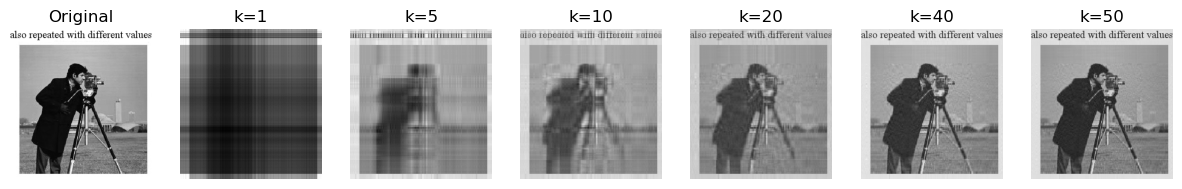


=== Textured Image ===
Original Image Size: 512 x 512 = 262144 values
k=1: Compressed Size=1025, Ratio=0.0039
k=5: Compressed Size=5125, Ratio=0.0196
k=10: Compressed Size=10250, Ratio=0.0391
k=20: Compressed Size=20500, Ratio=0.0782
k=40: Compressed Size=41000, Ratio=0.1564
k=50: Compressed Size=51250, Ratio=0.1955


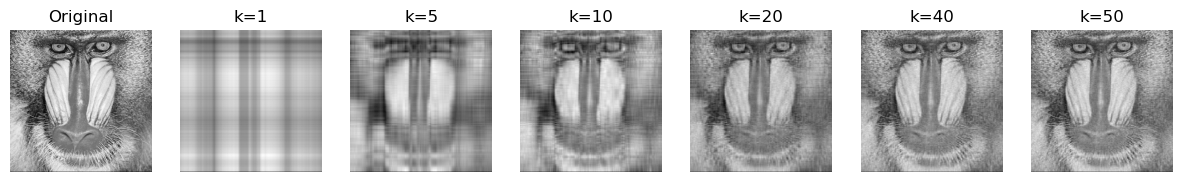

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def load_and_gray(path):
    img = io.imread(path)
    if img.ndim == 3:
        if img.shape[2] == 4:  # RGBA
            img = color.rgba2rgb(img)
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img / 255.0
    return img_gray

# SVD from Scratch
def svd_from_scratch(A):
    # Step 1: eigen-decomposition of A^T A
    ATA = A.T @ A
    eigvals, V = np.linalg.eigh(ATA)  # symmetric matrix, use eigh
    
    # Step 2: sort eigenvalues in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    V = V[:, idx]
    
    # Step 3: singular values
    S = np.sqrt(np.maximum(eigvals, 0))  # avoid negatives from numerical error
    
    # Step 4: compute U
    U = (A @ V) / (S + 1e-10)  # add epsilon to avoid div by zero
    
    return U, S, V.T

# Reconstruction
def svd_reconstruct(img, k, from_scratch=True):
    if from_scratch:
        U, S, VT = svd_from_scratch(img)
    else:
        U, S, VT = np.linalg.svd(img, full_matrices=False)
    return (U[:, :k] @ np.diag(S[:k]) @ VT[:k, :])

# Compression Details
def compression_details(img, k):
    m, n = img.shape
    original_size = m * n
    compressed_size = k * (m + n + 1)
    ratio = compressed_size / original_size
    return original_size, compressed_size, ratio

# Show Results
def show_results(img, ks, title="Image", from_scratch=True):
    m, n = img.shape
    print(f"\n=== {title} ===")
    print(f"Original Image Size: {m} x {n} = {m*n} values")

    fig, axes = plt.subplots(1, len(ks)+1, figsize=(15, 5))
    axes[0].imshow(img, cmap="gray")
    axes[0].set_title("Original")
    axes[0].axis("off")

    for i, k in enumerate(ks):
        recon = svd_reconstruct(img, k, from_scratch=from_scratch)
        orig, comp, ratio = compression_details(img, k)
        axes[i+1].imshow(recon, cmap="gray")
        axes[i+1].set_title(f"k={k}")
        axes[i+1].axis("off")
        print(f"k={k}: Compressed Size={comp}, Ratio={ratio:.4f}")

    plt.show()

paths = [
    "smooth_image.jpg",
    "Edge-dominant_image.png",
    "Textured_image.ppm"
]

names = ["Smooth Image", "Edge-dominant Image", "Textured Image"]

ks = [1, 5, 10, 20, 40, 50]

for path, name in zip(paths, names):
    img = load_and_gray(path)
    show_results(img, ks, title=name, from_scratch=True)


Observations

- Smooth images

-- Very few singular values are enough to preserve most of the image.

-- Example: At k=20, the image already looks very close to the original.

-- Inference: Smooth images are highly compressible with minimal quality loss.

- Edge-dominant images

-- More singular values are required compared to smooth images.

-- With too few k, edges become blurry and lose sharpness.

-- Inference: Edge information needs higher-rank approximation, but still compressible to some extent.

- Textured images

-- Even with large k, fine details are hard to capture.

-- Requires many singular values → less compression benefit.

-- Inference: Textured, high-frequency images are hard to compress without significant quality loss.